Download data Disini!!!!

https://drive.google.com/uc?export=download&id=1WrbvqsWUUlqFStXHyFmrzBmr-1E99lf9


*Objective:*

Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.


*Tentang Organisasi:*

HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam.

 

*Permasalahan:*

HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

 

*Penjelasan kolom fitur:*

- Negara : Nama negara
- Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
- Ekspor : Ekspor barang dan jasa perkapita
- Kesehatan: Total pengeluaran kesehatan perkapita
- Impor: Impor barang dan jasa perkapita
- Pendapatan: Penghasilan bersih perorang
- Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
- Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
- Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
- GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 

In [390]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

**Reading and Understanding Data**

In [391]:
df=pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [342]:
df.shape
#dalam data tersebut terdapat 167 baris dan 10 kolom, dimana ini merupakan penjelasan beberapa fitur kolomnya:

(167, 10)

Penjelasan kolom fitur:

- Negara : Nama negara
- Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
- Ekspor : Ekspor barang dan jasa perkapita
- Kesehatan: Total pengeluaran kesehatan perkapita
- Impor: Impor barang dan jasa perkapita
- Pendapatan: Penghasilan bersih perorang
- Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP
- Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
- Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
- GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi.

Dari beberapa fitur tersebut kita dapat mengelompokan fitur tersebut ke dalam dua kategori: asd adas
- faktor sosial ekonomi:
  - Ekspor
  - Impor
  - Pendapatan
  - Inflasi
  - GDPperkapita
- faktor kesehatan: 
  - Kematian_anak
  - Kesehatan
  - Harapan_hidup
  - Jumlah_fertiliti

**Exploratroy Data Analysis**

*Data Cleaning*

In [343]:
#kemudian dilakukan pengecekan terhadap missing value pada tiap-tiap fitur
df.info()
df.isnull().sum()
#dari hasil ini terlihat bahwa tiap fitur sudah aman dari missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

*Univariate Analysis*

In [344]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


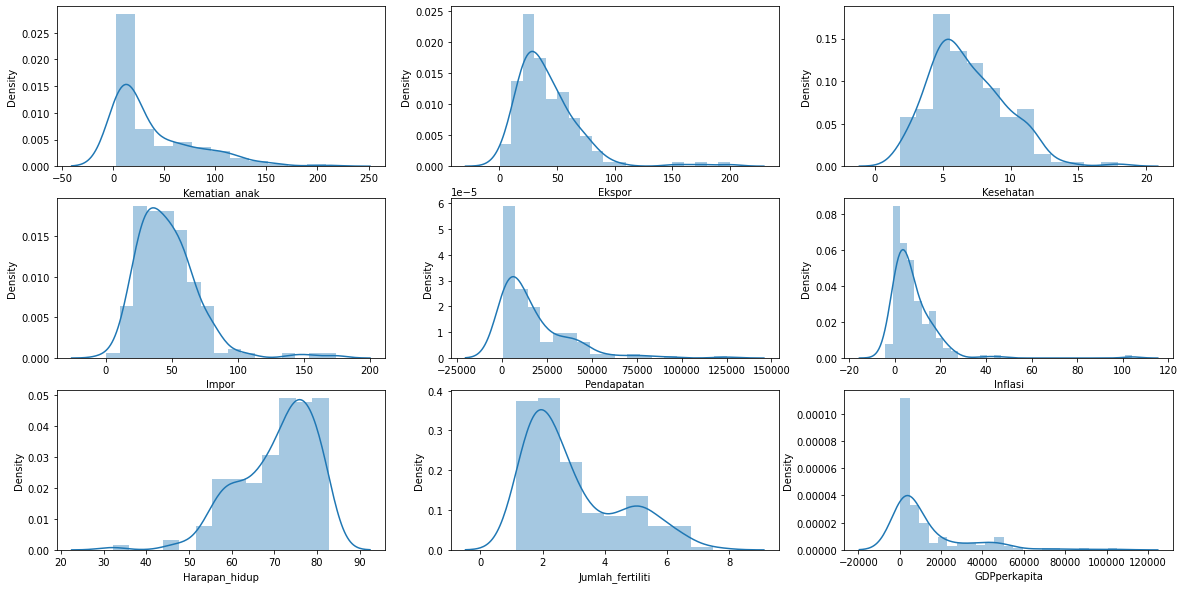

In [345]:
plt.figure(figsize=(20,10))
for i in enumerate (df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(df[i[1]])
plt.show()
#Jika kita lakukan univariate analysis pada masing-masing feature,

In [346]:
#feature-feature tersebut memiliki skewness dan kurtosisnya masing-masing:
print('Skewness Untuk masing-masing feature')
df.skew(axis=0)
#berdasarkan hasil tersebut, dapat dilihat baik dari grafik maupun dari fungsi skew,
#feature-feature di atas memiliki nilai skew yang positif kecuali hanya pada feature Harapan_hidup yang memiliki nilai negatif

Skewness Untuk masing-masing feature


Kematian_anak       1.450774
Ekspor              2.445824
Kesehatan           0.705746
Impor               1.905276
Pendapatan          2.231480
Inflasi             5.154049
Harapan_hidup      -0.970996
Jumlah_fertiliti    0.967092
GDPperkapita        2.218051
dtype: float64

In [347]:
#kurtosis disini adalah suatu nilai yg menggambarkan konsentrasi data di sekitar nilai rata-ratanya dan suatu nilai yg dapat mengindikasikan keberadaan outliernya.
print('Kurtosis Untuk masing-masing feature')
df.kurtosis(axis=0)
#berdasarkan hasil tersebut, dapat dilihat baik dari grafik maupun dari fungsi kurtosis,
#feature-feature di atas memiliki nilai kurtosis yang berbeda-beda:
#kurtosis < 3 --> platykurtic : Kematian_anak, Kesehatan, Harapan_hidup, Jumlah_fertiliti
#kurtosis > 3 --> leptokurtic : Ekspor, Impor, Pendapatan, Inflasi, GDPperkapita

Kurtosis Untuk masing-masing feature


Kematian_anak        1.766882
Ekspor              10.138666
Kesehatan            0.694196
Impor                6.755854
Pendapatan           7.028657
Inflasi             41.742502
Harapan_hidup        1.151591
Jumlah_fertiliti    -0.186779
GDPperkapita         5.527891
dtype: float64

*Bivariate Analysis*

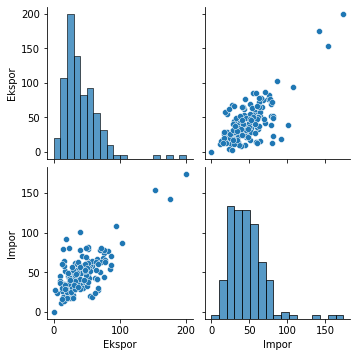

In [348]:
#misalkan kita lakukan bivariate analysis untuk masing2 faktor kesehatan dan sosial ekonomi:
#faktor sosial ekonomi
vars=['Ekspor', 'Impor']
sns.pairplot(data=df, x_vars=vars, y_vars=vars)
plt.show()
#jika dilihat dari grafik scatternya, variabel impor dan ekspor memiliki hubungan liniear berbanding lurus,
#disaat impor naik maka ekspor juga naik.

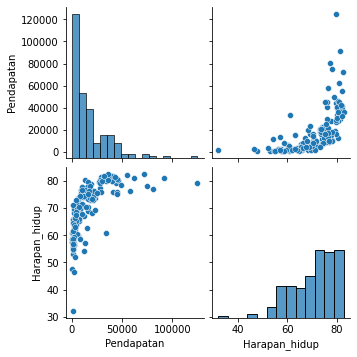

In [349]:
#faktor sosial ekonomi dan kesehatan
vars=['Pendapatan', 'Harapan_hidup']
sns.pairplot(data=df, x_vars=vars, y_vars=vars)
plt.show()
#jika dilihat dari grafik scatternya, variabel pendapatan dan harapan_hidup cukup memiliki hubungna yang liniear,
#namun seperti ada nilai asimtotik pada harapan_hidup, dimana pada nilai tersebut nilai variabel harapan_hidup konstan namun pendaptan terus meningkat.

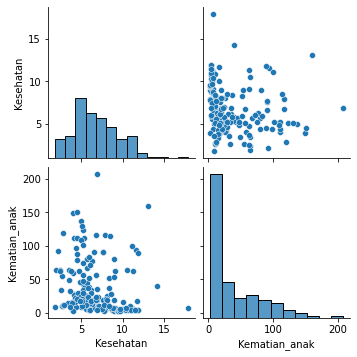

In [350]:
#faktor kesehatan
vars=['Kesehatan', 'Kematian_anak']
sns.pairplot(data=df, x_vars=vars, y_vars=vars)
plt.show()
#jika dilihat dari grafik scatternya, variabel kesehatan dan kematian anak tidak memiliki hubungna yang liniear,
#hal ini terlihat dari scater plotnya.

In [351]:
#hasil analisis scatter di atas, bisa divalidasi lewat menghitung nilai linear correlationnya, dimana
#jika nilai linear correlationnya berada pada rentang -0.5 sampai 0.5 itu lemah
#jika nilai linear correlationnya berada pada rentang -0.8 sampai 0.8 itu moderate
#jika nilai linear correlationnya berada pada rentang -1 sampai 1 itu kuat
#bisa dilihat pada tabel di bawah pada setiap variabelnya.
df.corr()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Kematian_anak,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
Ekspor,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
Kesehatan,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
Impor,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
Pendapatan,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
Inflasi,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
Harapan_hidup,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
Jumlah_fertiliti,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
GDPperkapita,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


*Multivariate Analysis*

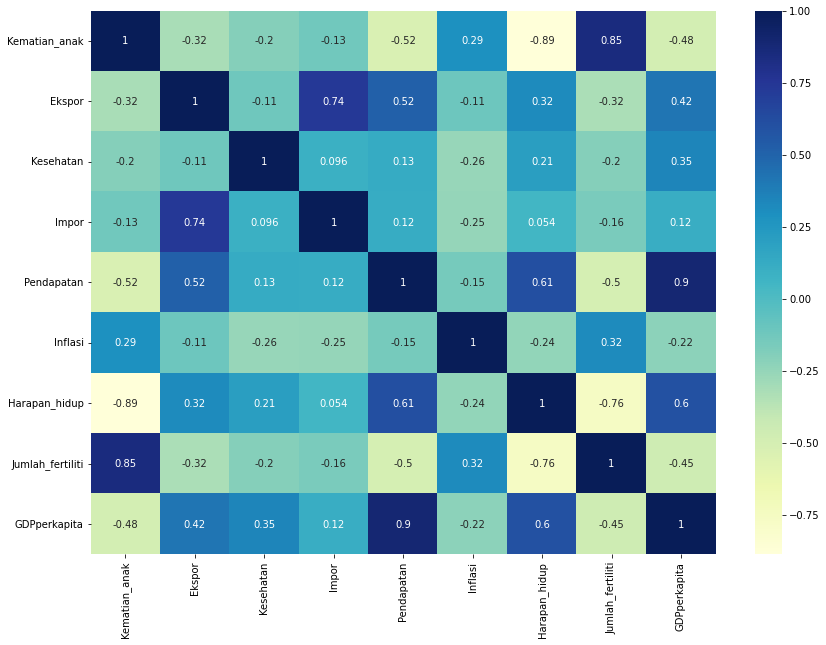

In [392]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap="YlGnBu")
plt.show()
#multivariate analysis ini dilakukan untuk menentukan variabel dari faktor sosialekonomi dan kesehatan yang akan digunakan untuk melakukan clustering berdasarkan nilai corelasi yang paling tinggi
#berdasarkan heatmap correlation antar variabel tersebut, kita bisa lihat untuk pasanga variabel dari faktor sosial ekonomi dan kesehatan, yang memiliki nilai corelation cukup kuat(>=0.5) adalah sebagai berikut:
#-kematian_anak vs pendapatan --> -0.57
#-Pendapatan vs Harapan Hidup --> 0.61
#-Pendapatan vs Jumlah_fertiliti --> -0.5
#-Harapan_hidup vs GDPperkapita --> 0.6

#sehingga dari hasil tersebut pasangan variabel yang akan digunakan untuk melakukan clustering adalah Pendapatan vs Harapan_hidup

In [393]:
#drop kolom 'Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Inflasi', 'Jumlah_fertiliti', 'GDPperkapita' karena kolom tersebut tidak terpakai untuk dilakukan clustering
df=df.drop(columns=['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Inflasi', 'Jumlah_fertiliti', 'GDPperkapita'])
df.head()

,Negara,Pendapatan,Harapan_hidup
0,Afghanistan,1610,56.2
1,Albania,9930,76.3
2,Algeria,12900,76.5
3,Angola,5900,60.1
4,Antigua and Barbuda,19100,76.8


In [354]:
df.describe()

,Pendapatan,Harapan_hidup
count,167.000000,167.000000
mean,17144.688623,70.555689
std,19278.067698,8.893172
min,609.000000,32.100000
25%,3355.000000,65.300000
50%,9960.000000,73.100000
75%,22800.000000,76.800000
max,125000.000000,82.800000


In [394]:
a=df #untuk menyimpan dataframe awal
a

,Negara,Pendapatan,Harapan_hidup
0,Afghanistan,1610,56.2
1,Albania,9930,76.3
2,Algeria,12900,76.5
3,Angola,5900,60.1
4,Antigua and Barbuda,19100,76.8
...,...,...,...
162,Vanuatu,2950,63.0
163,Venezuela,16500,75.4
164,Vietnam,4490,73.1
165,Yemen,4480,67.5


*Handling Outlier*

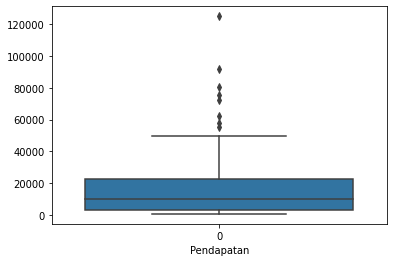

In [395]:
sns.boxplot(data=df['Pendapatan'])
plt.xlabel('Pendapatan')
plt.show()

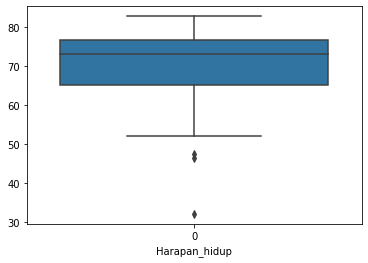

In [396]:
sns.boxplot(data=df['Harapan_hidup'])
plt.xlabel('Harapan_hidup')
plt.show()

Berdasarkan boxplot dari kedua parameter tersebut, masih terdapat outlier yang harus segera dihandle.

In [397]:
#Handling Outlier with IQR

#Buat fungsi untuk menghitung IQR untuk low dan upp bound terlebih dahulu
def get_lowerupper_bound(df):
  q1 = np.percentile(df, 25)
  q3 = np.percentile(df, 75)
  iqr=q3-q1
  lower_bound=q1-(iqr*1.5)
  upper_bound=q3+(iqr*1.5)
  df_final=df[(df >= lower_bound) & (df <= upper_bound) ]
  return(df_final)
df=get_lowerupper_bound(df[['Pendapatan', 'Harapan_hidup']])
#setelah Hnadling Outliers with IQR, drop nilai outliers yang berubah menjadi nilai NaN 
df.dropna(axis=0, inplace=True)

In [398]:
df

,Pendapatan,Harapan_hidup
0,1610.0,56.2
1,9930.0,76.3
2,12900.0,76.5
3,5900.0,60.1
4,19100.0,76.8
...,...,...
162,2950.0,63.0
163,16500.0,75.4
164,4490.0,73.1
165,4480.0,67.5


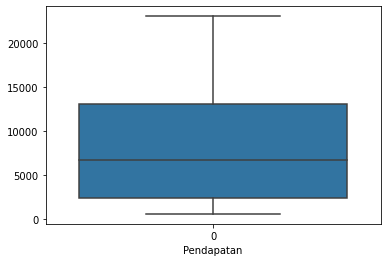

In [399]:
sns.boxplot(data=df['Pendapatan'])
plt.xlabel('Pendapatan')
plt.show()

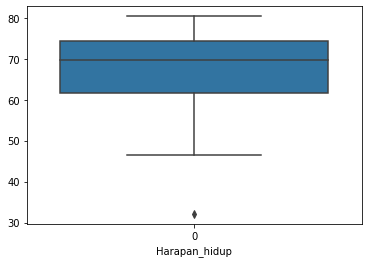

In [400]:
sns.boxplot(data=df['Harapan_hidup'])
plt.xlabel('Harapan_hidup')
plt.show()

n_cluster = 2


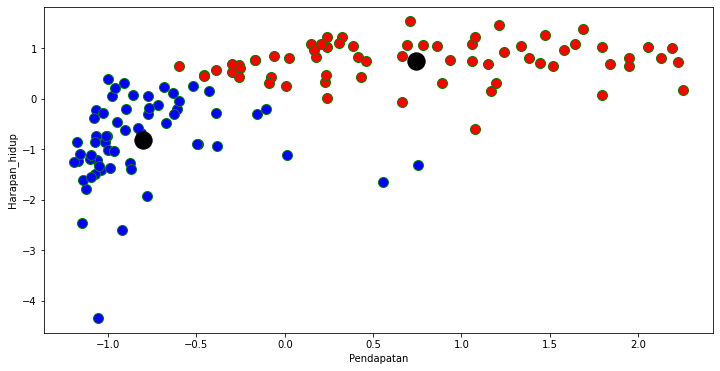

In [362]:
#Rescaling data with Standard Scaler
#feature scaling
sc=StandardScaler()
#nilainya diubah menjadi float
df_std=sc.fit_transform(df.astype(float))

#clustering with Kmeans
#misal pada awal jumlah cluster=2
kmeans1=KMeans(n_clusters=2, random_state=42).fit(df_std)

#label untuk dimasukan hasil clusteringnya
labels1=kmeans1.labels_

#
new_df_std=pd.DataFrame(data=df_std, columns=['Pendapatan', 'Harapan_hidup'])
#membuat kolom baru untuk data yg sudah terlabel tadi
new_df_std['label_kmeans1']=labels1
print('n_cluster = 2')

size=100

plt.figure(figsize=(12,6))
plt.scatter(new_df_std['Pendapatan'][ new_df_std['label_kmeans1'] == 0 ], new_df_std['Harapan_hidup'][ new_df_std['label_kmeans1'] == 0 ], c='blue', edgecolors='green', s=size)
plt.scatter(new_df_std['Pendapatan'][ new_df_std['label_kmeans1'] == 1 ], new_df_std['Harapan_hidup'][ new_df_std['label_kmeans1'] == 1 ], c='red', edgecolors='green', s=size)

#Plot posisi centroidnya
centers= kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=size*3)
plt.xlabel('Pendapatan')
plt.ylabel('Harapan_hidup')
plt.show()

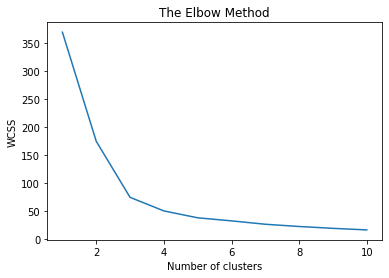

In [401]:
#gunakan elbow method untuk menentukan jumlah cluster yang direkomendasikan
wcss = []
for i in range(1, 11):
  kmeans = KMeans (n_clusters= i , init='k-means++', random_state = 42)
  kmeans.fit(new_df_std)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [402]:
#mencoba dengan 3 cluster
kmeans2=KMeans(n_clusters=3, init='k-means++', random_state=42).fit(df_std)
labels2=kmeans2.labels_
labels2

array([1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 1, 1,
       2, 1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0,
       0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1,
       1, 2, 0, 2, 2, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 2,
       1, 0, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 1, 0, 2, 2, 1], dtype=int32)

n_cluster = 3


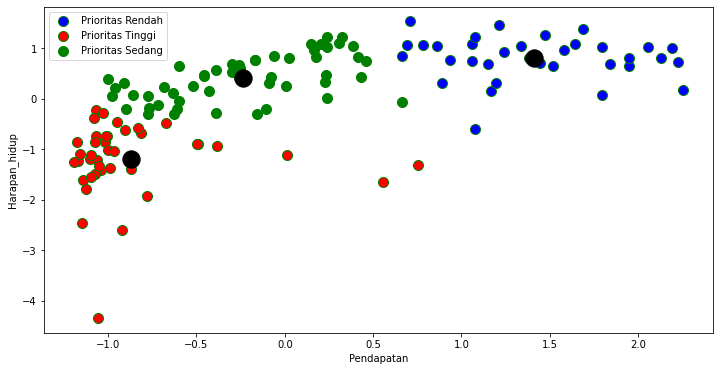

In [403]:
new_df_std['label_kmeans2']=labels2
print('n_cluster = 3')

size=100

plt.figure(figsize=(12,6))
plt.scatter(new_df_std['Pendapatan'][ new_df_std['label_kmeans2'] == 0 ], new_df_std['Harapan_hidup'][ new_df_std['label_kmeans2'] == 0 ], c='blue', edgecolors='green', s=size, label='Prioritas Rendah')
plt.scatter(new_df_std['Pendapatan'][ new_df_std['label_kmeans2'] == 1 ], new_df_std['Harapan_hidup'][ new_df_std['label_kmeans2'] == 1 ], c='red', edgecolors='green', s=size, label='Prioritas Tinggi')
plt.scatter(new_df_std['Pendapatan'][ new_df_std['label_kmeans2'] == 2 ], new_df_std['Harapan_hidup'][ new_df_std['label_kmeans2'] == 2 ], c='green', edgecolors='green', s=size, label='Prioritas Sedang')

#Plot posisi centroidnya
centers= kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=size*3)
plt.legend()
plt.xlabel('Pendapatan')
plt.ylabel('Harapan_hidup')
plt.show()

In [404]:
new_df_std

,Pendapatan,Harapan_hidup,label_kmeans1,label_kmeans2
0,-1.037827,-1.411396,0,1
1,0.236570,1.035209,1,2
2,0.691493,1.059554,1,0
3,-0.380716,-0.936682,0,1
4,1.641163,1.096070,1,0
...,...,...,...,...
122,-0.832575,-0.583689,0,1
123,1.242914,0.925660,1,0
124,-0.596690,0.645700,1,2
125,-0.598221,-0.035941,0,2


In [405]:
from sklearn.metrics import silhouette_score
print(silhouette_score(new_df_std, labels=labels1))
print(silhouette_score(new_df_std, labels=labels2))
#silhouette score ini digunakan untuk mengukur seberapa jauh cluster-cluste yang sudah dibuat terpisah antar klusternya.
#jika kita lihat nilai silhouette scorenya semakin mendekati satu saat diberikan 3 cluster, artinya cluster-cluster sudah terpisah dengan baik dan terlihat jelas perbedaannya

0.47545579797353626
0.5906902096850604


In [406]:
from sklearn.cluster import KMeans
kmeansa = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labelsa = kmeansa.labels_
labelsa

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int32)

In [407]:
kmeansb = KMeans(n_clusters = 3, random_state=42).fit(df_std)
labelsb = kmeansb.labels_
labelsb

array([1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 1, 1,
       2, 1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0,
       0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1,
       1, 2, 0, 2, 2, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 2,
       1, 0, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 1, 0, 2, 2, 1], dtype=int32)

In [408]:
new_df1 = pd.DataFrame(data=sc.inverse_transform(df_std), columns=['Pendapatan', 'Harapan_hidup'])
new_df1['label1_kmeans'] = labelsa
new_df1['label2_kmeans'] = labelsb
new_df1

,Pendapatan,Harapan_hidup,label1_kmeans,label2_kmeans
0,1610.0,56.2,0,1
1,9930.0,76.3,1,2
2,12900.0,76.5,1,0
3,5900.0,60.1,0,1
4,19100.0,76.8,1,0
...,...,...,...,...
122,2950.0,63.0,0,1
123,16500.0,75.4,1,0
124,4490.0,73.1,1,2
125,4480.0,67.5,0,2


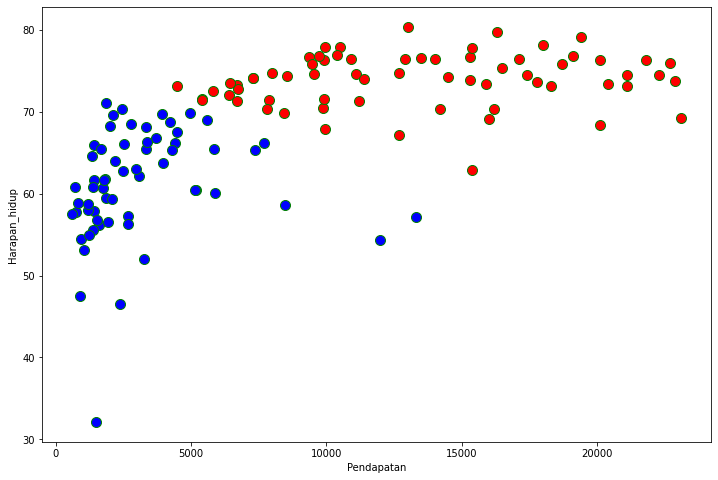

In [409]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['Pendapatan'][ new_df1['label1_kmeans'] == 0 ], new_df1['Harapan_hidup'][ new_df1['label1_kmeans'] == 0 ], c='blue', edgecolors='green', s=size, label='2')
plt.scatter(new_df1['Pendapatan'][ new_df1['label1_kmeans'] == 1 ], new_df1['Harapan_hidup'][ new_df1['label1_kmeans'] == 1 ], c='red', edgecolors='green', s=size, label='1')

#Plot posisi centroidnya
centers= kmeansa.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=size*3)
plt.xlabel('Pendapatan')
plt.ylabel('Harapan_hidup')
plt.show()

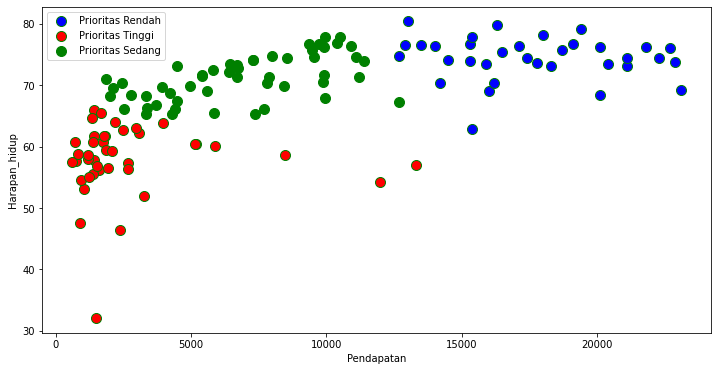

In [410]:
size=100

plt.figure(figsize=(12,6))
plt.scatter(new_df1['Pendapatan'][ new_df1['label2_kmeans'] == 0 ], new_df1['Harapan_hidup'][ new_df1['label2_kmeans'] == 0 ], c='blue', edgecolors='green', s=size, label='Prioritas Rendah')
plt.scatter(new_df1['Pendapatan'][ new_df1['label2_kmeans'] == 1 ], new_df1['Harapan_hidup'][ new_df1['label2_kmeans'] == 1 ], c='red', edgecolors='green', s=size, label='Prioritas Tinggi')
plt.scatter(new_df1['Pendapatan'][ new_df1['label2_kmeans'] == 2 ], new_df1['Harapan_hidup'][ new_df1['label2_kmeans'] == 2 ], c='green', edgecolors='green', s=size, label='Prioritas Sedang')

#Plot posisi centroidnya
centers= kmeansb.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=size*3)
plt.legend()
plt.xlabel('Pendapatan')
plt.ylabel('Harapan_hidup')
plt.show()

In [411]:
from sklearn.metrics import silhouette_score
print(silhouette_score(new_df_std, labels=labels1))
print(silhouette_score(new_df_std, labels=labels2))
#silhouette score ini digunakan untuk mengukur seberapa jauh cluster-cluste yang sudah dibuat terpisah antar klusternya.
#jika kita lihat nilai silhouette scorenya semakin mendekati satu saat diberikan 3 cluster, artinya cluster-cluster sudah terpisah dengan baik dan terlihat jelas perbedaannya

0.47545579797353626
0.5906902096850604


In [412]:
new_df1

,Pendapatan,Harapan_hidup,label1_kmeans,label2_kmeans
0,1610.0,56.2,0,1
1,9930.0,76.3,1,2
2,12900.0,76.5,1,0
3,5900.0,60.1,0,1
4,19100.0,76.8,1,0
...,...,...,...,...
122,2950.0,63.0,0,1
123,16500.0,75.4,1,0
124,4490.0,73.1,1,2
125,4480.0,67.5,0,2


In [413]:
#mergin data
b=pd.merge(new_df1, a, how='outer', on='Pendapatan')
b

,Pendapatan,Harapan_hidup_x,label1_kmeans,label2_kmeans,Negara,Harapan_hidup_y
0,1610.0,56.2,0.0,1.0,NaN,NaN
1,9930.0,76.3,1.0,2.0,Albania,76.3
2,12900.0,76.5,1.0,0.0,Algeria,76.5
3,5900.0,60.1,0.0,1.0,Angola,60.1
4,19100.0,76.8,1.0,0.0,Antigua and Barbuda,76.8
...,...,...,...,...,...,...
184,42900.0,NaN,NaN,NaN,Sweden,81.5
185,55500.0,NaN,NaN,NaN,Switzerland,82.2
186,1850.0,NaN,NaN,NaN,Timor-Leste,71.1
187,57600.0,NaN,NaN,NaN,United Arab Emirates,76.5


In [414]:
b.isnull().sum()

Pendapatan          0
Harapan_hidup_x    50
label1_kmeans      50
label2_kmeans      50
Negara             10
Harapan_hidup_y    10
dtype: int64

In [415]:
b.dropna(axis=0, inplace=True)

In [416]:
b

,Pendapatan,Harapan_hidup_x,label1_kmeans,label2_kmeans,Negara,Harapan_hidup_y
1,9930.0,76.3,1.0,2.0,Albania,76.3
2,12900.0,76.5,1.0,0.0,Algeria,76.5
3,5900.0,60.1,0.0,1.0,Angola,60.1
4,19100.0,76.8,1.0,0.0,Antigua and Barbuda,76.8
5,18700.0,75.8,1.0,0.0,Argentina,75.8
...,...,...,...,...,...,...
134,2950.0,63.0,0.0,1.0,Vanuatu,63.0
135,16500.0,75.4,1.0,0.0,Venezuela,75.4
136,4490.0,73.1,1.0,2.0,Vietnam,73.1
137,4480.0,67.5,0.0,2.0,Yemen,67.5


In [419]:
b=pd.merge(a, new_df1, how='inner', on='Pendapatan')
b

,Negara,Pendapatan,Harapan_hidup_x,Harapan_hidup_y,label1_kmeans,label2_kmeans
0,Albania,9930,76.3,76.3,1,2
1,Algeria,12900,76.5,76.5,1,0
2,Angola,5900,60.1,60.1,0,1
3,Antigua and Barbuda,19100,76.8,76.8,1,0
4,Argentina,18700,75.8,75.8,1,0
...,...,...,...,...,...,...
124,Vanuatu,2950,63.0,63.0,0,1
125,Venezuela,16500,75.4,75.4,1,0
126,Vietnam,4490,73.1,73.1,1,2
127,Yemen,4480,67.5,67.5,0,2


In [388]:
b.isnull().sum()

Pendapatan         0
Harapan_hidup_x    0
label1_kmeans      0
label2_kmeans      0
Negara             0
Harapan_hidup_y    0
dtype: int64

In [421]:
#negara yang memiliki prioritas tinggi untuk dibantu karena memiliki angka pendapatan dan harapan hidup yang paling rendah dibandingkan negara yang lainnya
label=b['label2_kmeans']==1
final=b[label]
final

,Negara,Pendapatan,Harapan_hidup_x,Harapan_hidup_y,label1_kmeans,label2_kmeans
2,Angola,5900,60.1,60.1,0,1
18,Botswana,13300,57.1,57.1,0,1
20,Burundi,764,57.7,57.7,0,1
22,Cameroon,2660,57.3,57.3,0,1
24,Chad,1930,56.5,56.5,0,1
28,Comoros,1410,65.9,65.9,0,1
29,"Congo, Dem. Rep.",609,57.5,57.5,0,1
30,"Congo, Rep.",5190,60.4,60.4,0,1
32,Cote d'Ivoire,2690,56.3,56.3,0,1
41,Eritrea,1420,61.7,61.7,0,1


In [423]:
final.shape

(34, 6)

In [424]:
final.describe()

,Pendapatan,Harapan_hidup_x,Harapan_hidup_y,label1_kmeans,label2_kmeans
count,34.000000,34.000000,34.000000,34.0,34.0
mean,2985.441176,58.055882,58.055882,0.0,1.0
std,2973.399699,5.935011,5.935011,0.0,0.0
min,609.000000,32.100000,32.100000,0.0,1.0
25%,1390.000000,56.575000,56.575000,0.0,1.0
50%,1900.000000,59.050000,59.050000,0.0,1.0
75%,3032.500000,60.800000,60.800000,0.0,1.0
max,13300.000000,65.900000,65.900000,0.0,1.0


In [426]:
final.sort_values(by='Pendapatan', ascending=True)

,Negara,Pendapatan,Harapan_hidup_x,Harapan_hidup_y,label1_kmeans,label2_kmeans
29,"Congo, Dem. Rep.",609,57.5,57.5,0,1
75,Liberia,700,60.8,60.8,0,1
20,Burundi,764,57.7,57.7,0,1
94,Niger,814,58.8,58.8,0,1
90,Mozambique,918,54.5,54.5,0,1
115,Togo,1210,58.7,58.7,0,1
53,Guinea-Bissau,1390,55.6,60.8,0,1
55,Madagascar,1390,60.8,60.8,0,1
54,Madagascar,1390,60.8,55.6,0,1
52,Guinea-Bissau,1390,55.6,55.6,0,1
